<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>


 # Informe Tecnico: Programando Redes Convolucionales

Integrantes: Pamela Aldana<br>
             Jacknel Bernard
          

Sección: DLY0200

Docente. Carlos Correa

Asignatura: Deep Learning
Sección: DLY0200

#**Contexto del caso Forma A**.

Deberá ser capaz de implementar un proyecto de Deep Learning, entrenando un modelo ajustado a partir de los datos entregados
para este caso. Desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones
de la ejecución del proyecto.<br>
Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.<br>
Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos
problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. <br>Un paso central para todas estas
implementaciones es la clasificación de imágenes. <br>Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa
tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.<br><br>
Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, <br>Tiene  de imágenes en escala de grises de baja resolucion (28X28)pixeles
<br>70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría.<br> El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. <br>Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

#FASE 1 :COMPRENDER EL NEGOCIO

Utilizaremos Tensor Flow  junto a Keras para programar varias Redes Neuronales  con el fin de predecir imágenes de ropa que estan clasificadas en 10 clases que son : 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot. Para esto vamos a disponer del Fashion MNIST dataset. Este dataset está separado en 60000 imágenes de entrenamiento y 10000 para el test,los cuales pueden ser obtenidos desde el tf.keras.

#FASE 2 :COMPRENDER LOS DATOS

## Importar librerías

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import seaborn as sns
from tensorflow.keras.layers import  Dense, Flatten, MaxPool2D  # capz entradas , ocultas, salidas
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.manifold import TSNE


In [50]:
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

##Carga de datos Fashion MNIST

In [51]:
# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Setear los seeds para números random
np.random.seed(30)
tf.random.set_seed(30)

# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostrar información sobre el conjunto de datos
print("Número de datos de entrenamiento:", len(train_images))
print("Número de datos de prueba:", len(test_images))
print("Forma  los de entrenamiento:", train_images[0].shape)
print("Categorias en la dataset:", np.unique(train_labels))
print("Clases:", clases)

Número de datos de entrenamiento: 60000
Número de datos de prueba: 10000
Forma  los de entrenamiento: (28, 28)
Categorias en la dataset: [0 1 2 3 4 5 6 7 8 9]
Clases: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
print(train_labels[:10])


[9 0 0 3 0 2 7 2 5 5]


In [ ]:
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]


#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

El set de datos debe ser pre-procesada antes de entrenar la red



In [ ]:
# Normalizar los datos de imágenes pero no cambiar la forma
X_train = train_images / 255.0
X_test = test_images / 255.0

# Aplanar las imágenes de entrada
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)





Se normalizan estos valores en un rango de 0 a 1 antes de utilizar el modelo de la red neuronal.


In [ ]:
# Convertir las etiquetas a one-hot encoding
Y_train = keras.utils.to_categorical(train_labels, 10)
Y_test = keras.utils.to_categorical(test_labels, 10)

# Verificar las dimensiones de los conjuntos de datos
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)


(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


## Grafica de una  imagen con su etiqueta

Podemos visualizar una imagen del dataset.<br>
Se visualiza la imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

label: T-shirt/top


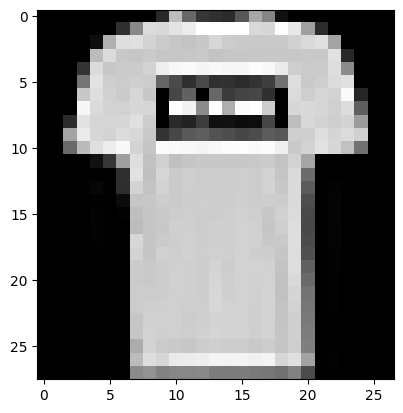

In [ ]:
i=1
img = train_images[i,:,i:]
plt.imshow(img, cmap='gray')
plt.show
print(f"label: {clases[train_labels[i]]}")


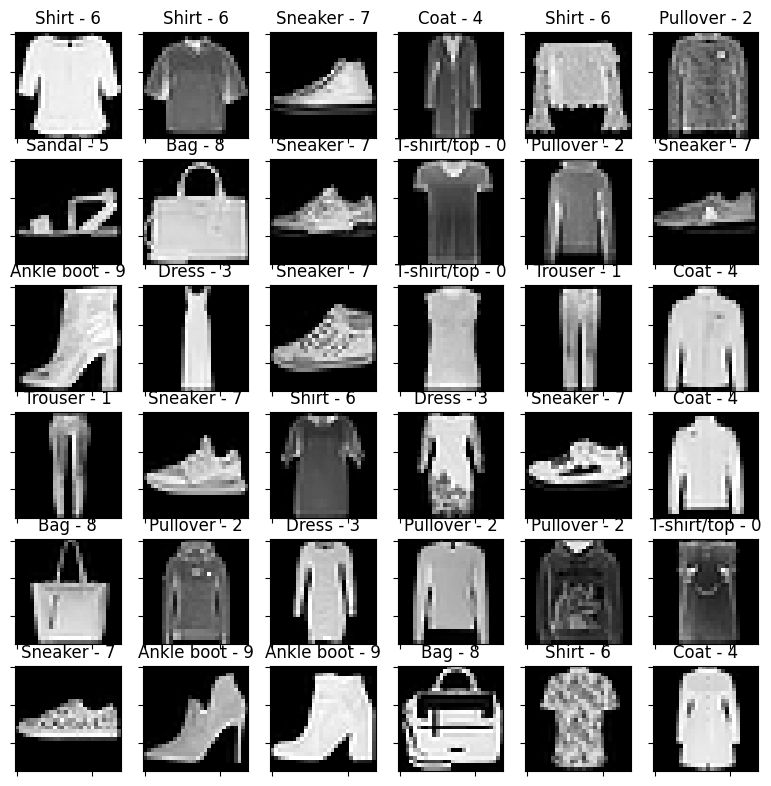

In [ ]:
# Mostramos una grilla de ejemplos (al azar)
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(train_images))
        axs[i,j].set_title(clases[train_labels[ex]] + " - " + str(train_labels[ex]))
        axs[i,j].grid(False)
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].imshow(train_images[ex], cmap='gray')
plt.show()


Se puede observar que las etiquetas  de las clases se no se asignaron correctamente,  ya que varias imágenes no corresponden a las categorías esperadas.

#FASE 4 MODELADO

#Comparar MLP y CNN

##**1- Modelo MLP elegido**

**Tabla mejor Resultado MLP**
* **N° Capas**	4
* **Capas** 	1ª  primera capa oculta: 512,activation='sigmoid'
 <br> 2ª  segunda capa oculta: 256 ,activation='relu  <br> 3ª tercera capa oculta:128 , activation='sigmoid'<br> Capa de salida: 10 (número de neuronas en la capa de salida), Softmax
*N° Épocas :20
* **Batch size**	128
* **Tamaño Kernel**	3x3
* **Padding**
* **Stride**	(1, 1)
* **Técnica de regularización**	Dropout (0.5 en cada capa oculta)
* **Optimizador**	Adam
* **Función de salida**	Softmax
* **Val_Acc**	(valor de precisión en el conjunto de validación)
* **Loss**	(valor de pérdida en el conjunto de validación)


En resumen, este código define, compila, entrena y evalúa un modelo MLP para clasificación multiclase, utilizando Dropout como técnica de regularización y Early Stopping para evitar el sobreajuste.

(60000, 28, 28)
(10000, 28, 28)
X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)
784 10 60000 10000
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
               

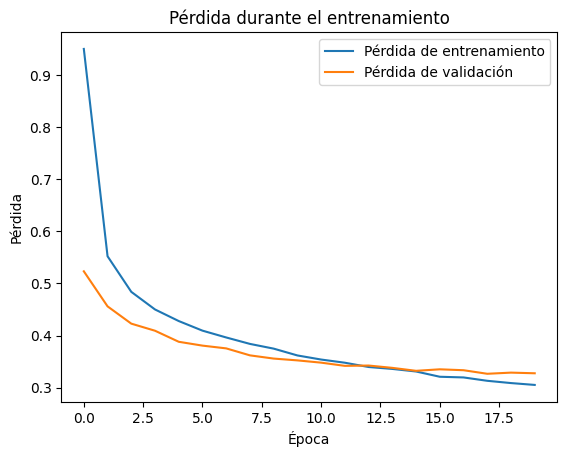

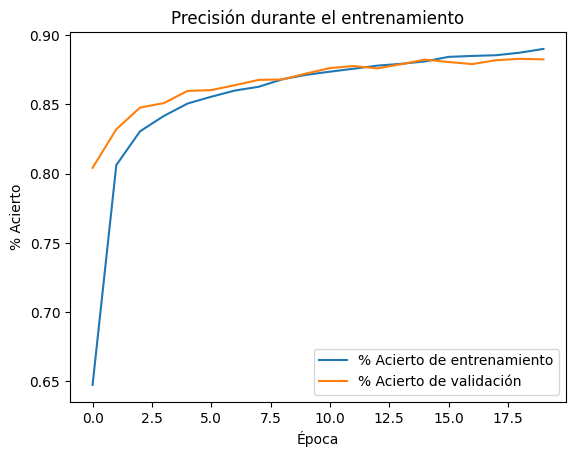

In [52]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)



h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
C=10

# Definir el modelo con Dropout
red= keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N,activation='sigmoid', name='primera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout con una tasa de 0.2 (ajustar según sea necesario)
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(Dropout(0.5))  # Agregar Dropout
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

# arquitectura
red.summary()


# Compilar el modelo
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Agregar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)  # Detener el entrenamiento si la pérdida de validación deja de disminuir después de 3 épocas

# Entrenar el modelo con Dropout y Early Stopping
hist = red.fit(X_train, Y_train,
               epochs=20,
               batch_size=128,
               validation_data=(X_test, Y_test),
               callbacks=[early_stopping]
               )

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


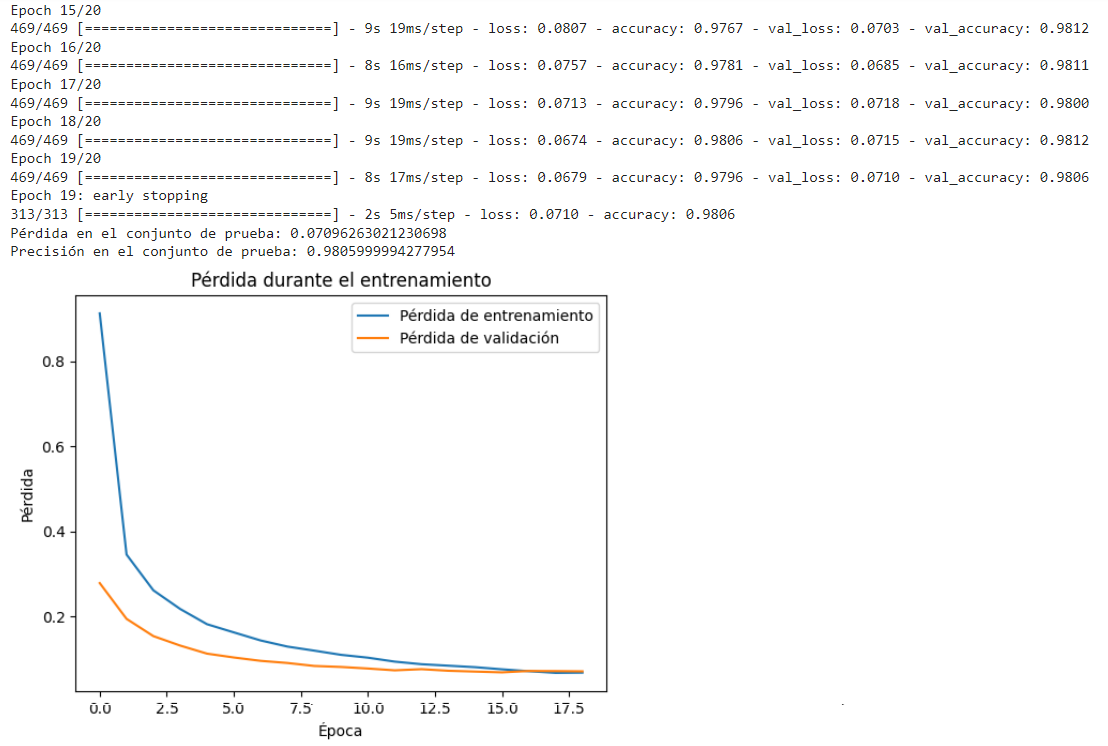

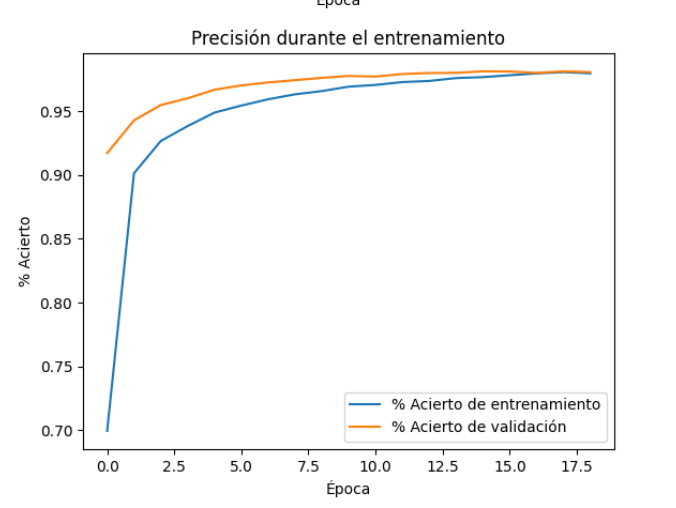

El modelo con Dropout ha logrado una mayor precisión y una pérdida más baja en comparación con los otros modelo anterior. Esto sugiere que la regularización mediante Dropout ha sido efectiva para mejorar el rendimiento del modelo en la tarea de clasificación de imágenes de Fashion-MNIST.

**Se utilizar el mismo número de capas y neuronas por capa para experimentar con los diferentes tipos de redes**

In [55]:
#REDES CNN
from tensorflow.keras.datasets import fashion_mnist
(train_imagen, labs_trains), (test_imagen, labs_tests) = fashion_mnist.load_data()

# Normalizamos los datos de imágenes y expandimos las dimensiones para incluir el canal de color
X_trains = train_imagen / 255.0
X_tests = test_imagen / 255.0

#Expandimos las dimensiones para incluir el canal de color gris
X_trains = X_trains.reshape(-1, 28, 28, 1)
X_tests = X_tests.reshape(-1, 28, 28, 1)

# Convertir las etiquetas en vectores one-hot
Y_trains = keras.utils.to_categorical(labs_trains, 10)
Y_tests = keras.utils.to_categorical(labs_tests, 10)

# Establecer semillas para reproducibilidad
np.random.seed(30)
tf.random.set_seed(30)

##**2- Modelo CNN basado en la arquitectura MLP**

* **Pérdida en el conjunto de prueba**: 0.2975147068500519
* P**recisión en el conjunto de prueba**: 0.9079999923706055
* P**érdida en el conjunto de entrenamiento**: 0.1316140592098236
* **Precisión en el conjunto de entrenamiento**: 0.9493833184242249

In [ ]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
C=10


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_12 (Flatten)        (None, 576)             

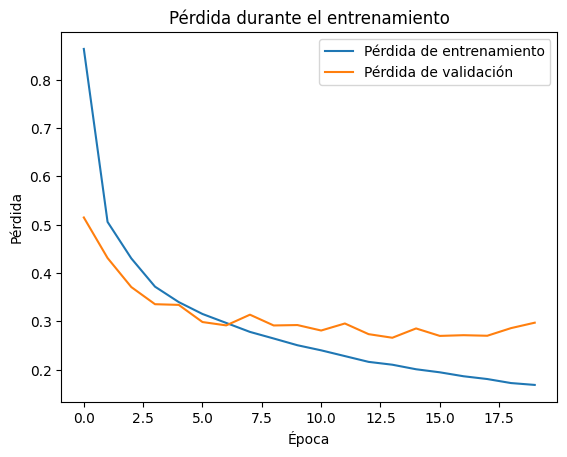

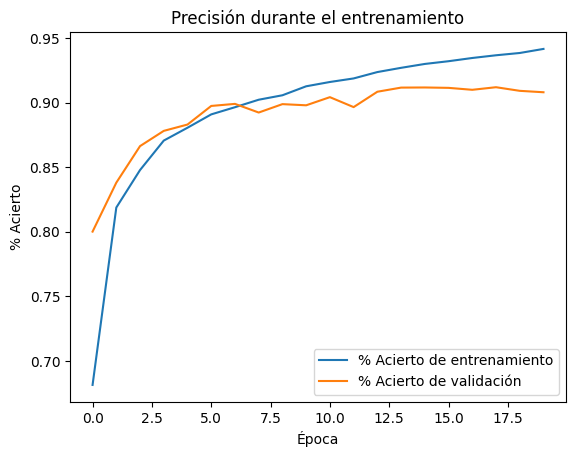

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo con Dropout
red_mlp = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(h1, activation='sigmoid', name='primera_capa'),
    Dropout(0.5),  # Agregar Dropout
    Dense(h2, activation='relu', name='segunda_capa'),
    Dropout(0.5),  # Agregar Dropout
    Dense(h3, activation='sigmoid', name='tercera_capa'),
    Dropout(0.5),  # Agregar Dropout
    Dense(C, activation='softmax', name='capa_de_output')
])

# Imprimir la arquitectura
red_mlp.summary()

# Compilar el modelo propio

red_mlp.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

# Entrenar el modelo propio
hist_mlp = red_mlp.fit(
    X_trains,Y_trains,
    batch_size=64,
    epochs=20,
    validation_data=(X_tests,Y_tests)
)


# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_mlp.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_mlp.evaluate(X_trains, Y_trains)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_mlp.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_mlp.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_mlp.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)


##CONCLUSION COMPARACION MLP Y CNN  (ARQUITECTURAS SIMILARES)

**CNN**
Pérdida en el conjunto de prueba: 0.2975147068500519<br>
Precisión en el conjunto de prueba: 0.9079999923706055<br>
Pérdida en el conjunto de entrenamiento: 0.1316140592098236<br>
Precisión en el conjunto de entrenamiento: 0.9493833184242249<br>

**MLP**Pérdida en el conjunto de prueba: 0.07452438771724701<br>
Precisión en el conjunto de prueba: 0.9818000197410583<br>
 loss: 0.0090 - accuracy: 0.9970 <br>

** Análisis:**
Accuracy y Pérdida:
**CNN:**

Entrenamiento: Alta precisión (0.9494) y baja pérdida (0.1316), lo que indica que el modelo se entrena bien.
Prueba: La precisión es buena (0.9080), pero hay una diferencia significativa entre la pérdida de entrenamiento y la pérdida de prueba (0.1316 vs. 0.2975). Esto sugiere que el modelo puede estar sobreajustado o que la capacidad de generalización es menor en datos no vistos.

**MLP:**

Entrenamiento: Muy alta precisión (0.9970) y muy baja pérdida (0.0090), lo que indica un excelente rendimiento en el conjunto de entrenamiento.
Prueba: Alta precisión (0.9818) y baja pérdida (0.0745), lo que sugiere que el modelo generaliza muy bien y no está sobreajustado.

 <BR> El modelo con MLP se utilizo Dropout ha logrado una mayor accuracy y una pérdida más baja en comparación con el modelo anterior. Esto indica que la regularización mediante Dropout ha sido efectiva para mejorar el rendimiento del modelo en la tarea de clasificación de imágenes de Fashion-MNIST.

**Resultados obtenidos con MLP**
**N° Capas:**
4 (incluyendo la capa de entrada y la capa de salida)

**N° Neuronas por capa:**

* Capa de entrada: 512 neuronas (con Dropout)
* Primera capa oculta: 256 neuronas (con Dropout)
* Segunda capa oculta: 128 neuronas (con Dropout)
* Capa de salida: 10 neuronas
**N° Épocas:**20

Regularizador:
Dropout (con una tasa de 0.5 en cada capa oculta)
EarlyStopping

**Optimizado**r:Adam



**Hiperparámetros de CNN:**

**N° de Capas:** 7 (incluyendo la capa de entrada y la capa de salida)
**N° de Neuronas por capa:**
* Capa de entrada: No tiene neuronas en sentido tradicional, se especifica la forma de los datos de entrada (28x28x1).
* Primera capa convolucional: 32 filtros (tamaño del filtro: 3x3), función de activación 'tanh'.
* Primera capa de pooling: Reducción de la dimensión.
* Segunda capa convolucional: 32 filtros (tamaño del filtro: 3x3), función de activación 'relu'.
* Segunda capa de pooling: Reducción de la dimensión.
* Tercera capa convolucional: 64 filtros (tamaño del filtro: 3x3), función de activación 'relu'.
* Capa densa: 64 neuronas, función de activación 'relu', con Dropout.
* Capa de salida: 10 neuronas, función de activación 'softmax'.
* N° de Épocas: 20
*Regularizador: Dropout (0.5) en la capa densa. EarlyStopping
* Optimizador: Adam

##Cambio en Hiperparametros Explicación:



Strides: El parámetro strides controla cómo se mueve el filtro a lo largo de la entrada. En el primer Conv2D, usamos strides=(2, 2) para especificar un desplazamiento de dos píxeles en cada dirección. Esto reduce la dimensión espacial de la salida y puede ayudar a reducir la carga computacional y a extraer características a diferentes escalas. En los siguientes Conv2D, mantenemos strides=(1, 1) para mantener la dimensión espacial de la salida igual que la entrada.

Padding: El parámetro padding controla cómo se manejan los bordes de la imagen durante la convolución. padding='valid' significa que no se agrega relleno y la salida será más pequeña que la entrada. Esto se utiliza para reducir la dimensión espacial y extraer características principales. padding='same' significa que se agrega relleno para que la salida tenga la misma dimensión espacial que la entrada. Esto puede ser útil cuando se desea mantener la resolución espacial de la imagen.

 Una CNN con tres capas convolucionales seguidas de capas de MaxPooling para reducir las dimensiones. Luego, las características se aplanan y se conectan a capas densas (totalmente conectadas) similares a la arquitectura del MLP que proporcionaste. Se aplica Dropout después de cada capa densa para regularizar el modelo.

Early Stopping:

Prevención del sobreentrenamiento: Detiene el entrenamiento antes de que el modelo comience a sobreajustar el conjunto de entrenamiento y pierda capacidad de generalización.Se evita el entrenamiento innecesario una vez que el modelo ha alcanzado su mejor rendimiento en el conjunto de validación.

#PARTE 1: Redes Convolucionales

**IMPORTANTE:** utilizar el mismo número de capas y neuronas por capa para experimentar con los diferentes tipos de redes.

##**Primer Modelo de CNN**


**Numero de capas** : N° Capas : 5 (3 capas convolucionales y 2 capas densas).

**Neuronas por capa**: Capa 1: 32, Capa 2: 64, Capa 3: 64, Capa 4: 128, Capa de salida: 10.

red_conv,hist_conv

**Tabla Modelo Propio**

* **N° Capas** : 5 (3 capas convolucionales y 2 capas densas).
* **Neuronas por capa** : Capa 1: 32, Capa 2: 64, Capa 3: 64, Capa 4: 128, Capa de salida: 10.
* **N° Épocas**: 30 épocas de entrenamiento.
* **N° Kernel**: 3 kernels por cada una de las tres capas convolucionales.
* **Tamaño Kerne**l: 3x3 para todas las capas convolucionales.
* **Padding**: Utilizado Same padding para mantener el tamaño de la imagen.
* **Pooling**: Se utilizó MaxPooling(técnica de reducción de dimensionalidad ) en todas las capas convolucionales.
* **Stride**: Se utilizó un stride de 2 en todas las capas convolucionales.


In [ ]:
# Definir el modelo propio
red_conv = keras.Sequential()
red_conv.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
red_conv.add(MaxPooling2D((2, 2)))
red_conv.add(Conv2D(64, (3, 3), activation='relu'))
red_conv.add(MaxPooling2D((2, 2)))
red_conv.add(Conv2D(64, (3, 3), activation='relu'))
red_conv.add(Flatten())#convierte el tensor tridimensional en un vector unidimensional
red_conv.add(Dense(128, activation='relu'))
red_conv.add(Dense(10, activation='softmax'))

# Imprimimos Arquitectura
red_conv.summary()




Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)            

**Entrenando**

In [ ]:
# Compilar el modelo propio

red_conv.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

# Entrenar el modelo propio
hist_conv = red_conv.fit(
    X_trains,Y_trains,
    batch_size=64,
    epochs=30,
    validation_data=(X_tests,Y_tests)
)


Epoch 1/30
938/938 [==============================] - 71s 75ms/step - loss: 0.2180 - accuracy: 0.9203 - val_loss: 0.2854 - val_accuracy: 0.9007
Epoch 2/30
938/938 [==============================] - 65s 69ms/step - loss: 0.2140 - accuracy: 0.9222 - val_loss: 0.2795 - val_accuracy: 0.9018
Epoch 3/30
938/938 [==============================] - 66s 71ms/step - loss: 0.2116 - accuracy: 0.9236 - val_loss: 0.2798 - val_accuracy: 0.9021
Epoch 4/30
938/938 [==============================] - 71s 76ms/step - loss: 0.2072 - accuracy: 0.9237 - val_loss: 0.2758 - val_accuracy: 0.9046
Epoch 5/30
938/938 [==============================] - 75s 80ms/step - loss: 0.2035 - accuracy: 0.9258 - val_loss: 0.2851 - val_accuracy: 0.9020
Epoch 6/30
938/938 [==============================] - 67s 72ms/step - loss: 0.2017 - accuracy: 0.9264 - val_loss: 0.2778 - val_accuracy: 0.9043
Epoch 7/30
938/938 [==============================] - 86s 91ms/step - loss: 0.1993 - accuracy: 0.9262 - val_loss: 0.2751 - val_accuracy:

1875/1875 [==============================] - 23s 12ms/step - loss: 0.1383 - accuracy: 0.9487
Pérdida en el conjunto de prueba: 0.28260889649391174
Precisión en el conjunto de prueba: 0.9086999893188477
Pérdida en el conjunto de entrenamiento: 0.13832029700279236
Precisión en el conjunto de entrenamiento: 0.9487166404724121


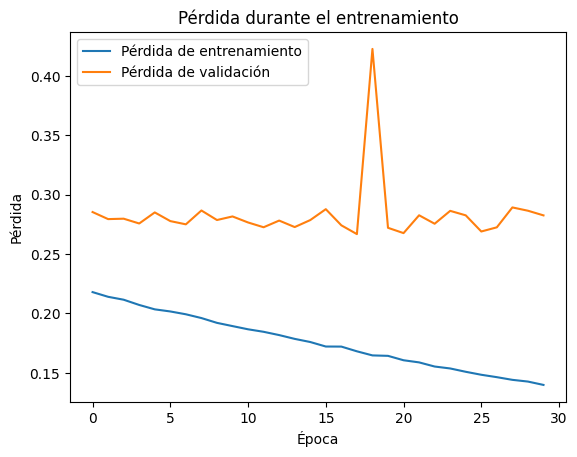

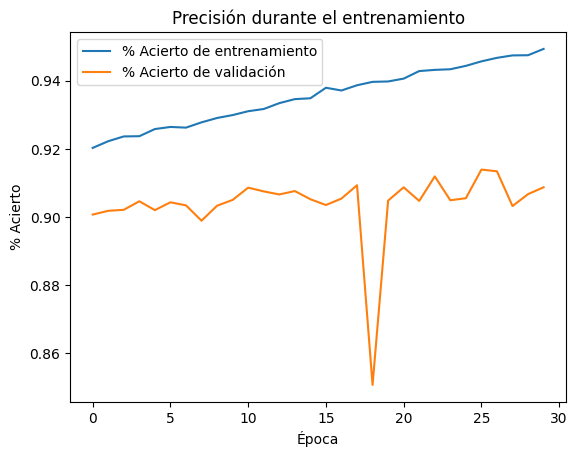

In [ ]:

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_conv.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_conv.evaluate(X_trains, Y_trains)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_conv.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_conv.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_conv.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_conv.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

**Conclusion:**

* Pérdida en el conjunto de prueba: 0.28260889649391174*
* Precisión en el conjunto de prueba: 0.9086999893188477
* Pérdida en el conjunto de entrenamiento: 0.13832029700279236
* Precisión en el conjunto de entrenamiento: 0.9487166404724121

* El modelo tiene una pérdida de 0.2826 en el conjunto de validación. Este valor es más alto que la pérdida en el conjunto de entrenamiento 0.1398 , lo cual puede indica que el modelo no se generaliza tan bien a los datos no vistos como a los datos de entrenamiento

* La pérdida en el conjunto de validación (val_loss) es más alta que en el conjunto de entrenamiento (loss), lo que puede indicar sobreajuste (overfitting). El modelo esta memorizando los datos de entrenamiento en lugar de aprender a generalizar a nuevos datos.
*  La precisión en el conjunto de validación (val_accuracy) es menor que en el conjunto de entrenamiento (accuracy), lo que también indica sobreajuste. Sin embargo, la diferencia no es extremadamente grande, lo que significa que el modelo aún está funcionando razonablemente bien en los datos de validación.


Este modelo al ser con optimizador SGD, es lento para compilar.

**Conclusion:**

## Segundo MODELO CNN CON CAMBIO DE HIPERPARAMETROS


**Cambios**

 optimizer='Adam'<br>
 epocas= 20<br>
 batch_size=128<br>
 padding='valid' significa que no se agrega relleno y la salida será más pequeña que la entrada. Esto se utiliza para reducir la dimensión espacial y extraer características principales.<br>
  strides=(1, 1)

**Tabla Modelo**
* **N° Capas**:	5 (3 capas convolucionales y 2 capas densas)
* **Neuronas por capa**	Capa 1: 32, Capa 2: 64, Capa 3: 64, Capa 4: 128, Capa de salida: 10
* **N° Épocas**	20 épocas de entrenamiento
* **N° Kernel** : 3 kernels por cada una de las tres capas convolucionales
* **Tamaño Kernel**	3x3 para todas las capas convolucionales
* **Padding**	: valid  para mantener el tamaño de la imagen
* **Pooling	MaxPooling**: en todas las capas convolucionales
* **Stride**:  1 en todas las capas convolucionales
* **Función de activación**: ReLU para todas las capas convolucionales, excepto la capa de salida que usa Softmax


**Pérdida en el conjunto de prueba:** 0.32025760412216187<br>
**Precisión en el conjunto de prueba**: 0.911300003528595<br>

**Recall en el conjunto de prueba**: 0.9113000000000001<br>
**F1-score en el conjunto de prueba**: 0.9100989025844939<br>
<br>
**Pérdida en el conjunto de entrenamiento:** 0.07643817365169525<br>
**Precisión en el conjunto de entrenamiento**: 0.9712166786193848


Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 576)             

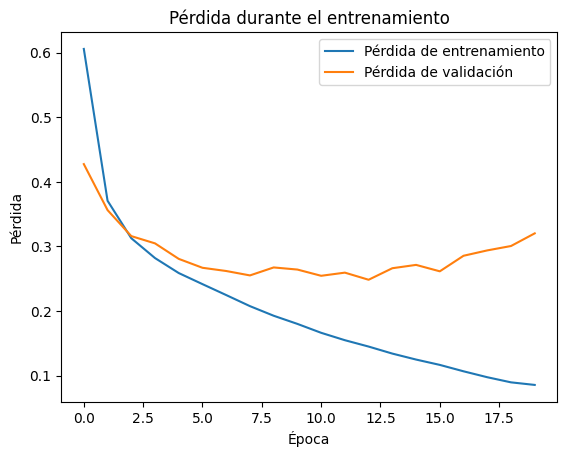

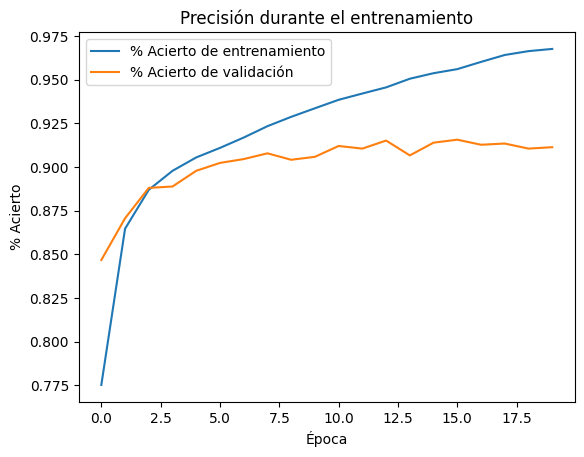

In [ ]:
# Definir el modelo propio
red_conv1 = keras.Sequential()
red_conv1.add(Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
red_conv1.add(MaxPooling2D((2, 2)))
red_conv1.add(Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
red_conv1.add(MaxPooling2D((2, 2)))
red_conv1.add(Conv2D(64, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
red_conv1.add(Flatten())#convierte el tensor tridimensional en un vector unidimensional
red_conv1.add(Dense(128, activation='relu'))
red_conv1.add(Dense(10, activation='softmax'))

# Imprimimos Arquitectura
red_conv1.summary()

# Compilar el modelo propio

red_conv1.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',  #-> adam es mejor función de optimizador que sgd
    metrics=['accuracy']
)

# Entrenar el modelo propio
hist1 = red_conv1.fit(
    X_trains,Y_trains,
    batch_size=128,
    epochs=20,
    validation_data=(X_tests,Y_tests)
)


# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red_conv1.evaluate(X_tests, Y_tests)
train_loss, train_accuracy = red_conv1.evaluate(X_trains, Y_trains)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist1.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist1.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Pérdida en el conjunto de entrenamiento:', train_loss)
print('Precisión en el conjunto de entrenamiento:', train_accuracy)


In [ ]:

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = red_conv1.predict(X_tests)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir las etiquetas verdaderas al formato de clasificación
y_true = np.argmax(Y_tests, axis=1)

# Calcular las métricas adicionales
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Imprimir las métricas
print('Precisión en el conjunto de prueba:', precision)
print('Recall en el conjunto de prueba:', recall)
print('F1-score en el conjunto de prueba:', f1)


313/313 [==============================] - 6s 18ms/step
Precisión en el conjunto de prueba: 0.9108444319680465
Recall en el conjunto de prueba: 0.9113000000000001
F1-score en el conjunto de prueba: 0.9100989025844939


**CONCLUSION**
 Este segundo modelo tiene estas metricas :<br>
**Desempeño en el Conjunto de Entrenamiento**:
<br>*
* Precisión en el conjunto de entrenamiento: 97.12%
* Pérdida en el conjunto de entrenamiento: 0.0764

* El modelo tiene un buen desempeño en el conjunto de entrenamiento, con una precisión alta y una pérdida baja. Esto sugiere que el modelo ha aprendido bien las características del conjunto de entrenamiento

**Desempeño en el Conjunto de Prueba**:

Precisión en el conjunto de prueba: 91.13%
Pérdida en el conjunto de prueba: 0.3203

* Aunque la precisión en el conjunto de prueba es muy poco  inferior a la del conjunto de entrenamiento, sigue siendo bastante alta, lo que indica que el modelo tiene una buena capacidad de generalización. Sin embargo, la diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de prueba sugiere que el modelo podría estar sufriendo de un ligero sobreajuste.



Finalmente, El segundo modelo presenta un buen equilibrio entre pérdida y precisión, con un rendimiento notable en el conjunto de prueba. Sin embargo, hay margen para mejorar su capacidad de generalización mediante técnicas adicionales de regularización, aumento de datos y ajuste de hiperparámetros. Implementar estas mejoras podría llevar a un modelo más robusto y con mejor desempeño en datos no vistos.

##**Análisis de resultados**<br>


**¿En qué influye añadir padding en el entrenamiento de la red y para qué sirve?**. Expliquen en 5 líneas.<br>


El padding influye en cómo se procesan los bordes de las imágenes durante el entrenamiento de la red. Al agregar padding, se puede controlar cómo se manejan los bordes de las imágenes, lo que ayuda a preservar mejor la información espacial y reduce la pérdida de detalles en las capas convolucionales.
<br>
En el modelo (MLP), no se utiliza convoluciones, el padding no sería relevante ya que las capas densas procesan datos de forma global.

* El primer modelo de CNN, el padding "same" se utiliza en las capas convolucionales para mantener el tamaño de las imágenes a medida que se aplican las convoluciones. Esto asegura que las características espaciales importantes en los bordes de las imágenes se capturen adecuadamente, evitando así la pérdida de información y mejorando la calidad de las representaciones aprendidas.

* El padding "valid",  podría recortar información de los bordes de las imágenes.


**Indica la cantidad de parámetros que generó la red MLP versus la CNN. ¿Por qué se produce la diferencia?**<br>
* La red MLP (Perceptrón Multicapa) generó más parámetros que la CNN (Convolutional Neural Network). Esto se debe a que en la MLP, cada neurona de una capa está conectada a todas las neuronas de la capa siguiente, lo que resulta en un gran número de conexiones y parámetros. En cambio, en la CNN, las capas convolucionales comparten pesos y se aplican filtros espaciales, lo que reduce significativamente el número de parámetros requeridos.

**¿Cuál es el impacto de usar stride? ¿Qué valor usaron? ¿y por qué?**
**Impacto del stride**:<br>

El stride afecta la cantidad de desplazamiento que tiene el filtro convolucional al recorrer la entrada durante la convolución. Un stride mayor reduce el tamaño de la salida y la resolución espacial de los mapas de características. En modelo CNN primer y  segundo modelo CNN,  se utilizó un stride de 1, lo que significa que el filtro se desplaza de 1 en 1 píxel. Se eligió este valor para conservar la resolución espacial de los mapas de características y evitar una reducción excesiva del tamaño.<br>



#**Parte 2. Mejorando el desempeño de Redes Convolucionales**

Registra todos los hiperparámetros que te permitieron alcanzar este accuracy, y si no logran el accuracy solicitado, fundamenten la teoría de por que no se alcanzó.

* Dropout:Regularización: Reduce el riesgo de sobreajuste al prevenir que las neuronas dependan excesivamente de ciertas características. Esto fuerza al modelo a aprender representaciones más robustas y generalizables.
* La técnica de Early Stopping se usa para detener el entrenamiento si la pérdida de validación no mejora después de 3 épocas, restaurando los mejores pesos obtenidos durante el entrenamiento. Esto ayuda a prevenir el sobreajuste.

Con estos ajustes, el modelo debería tener una mejor capacidad de generalización y posiblemente mejorar su rendimiento en el conjunto de prueba.

##**Tercer modelo CNN:  con Dropout y Early stopping**

**Hiperparametros que cambian :**

padding='same', activation='tanh',
* Dropout(0.5)capa densa
* neuronas: 32, 32,64
*dense 64
* batch_size=64





MaxPooling2D((2, 2)), se utiliza una ventana de agrupación máxima de 2x2 píxeles. Este parámetro indica la dimensión de la ventana utilizada para agrupar los valores máximos.

Dropout solo en  capas densas  y  Early stopping ,


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

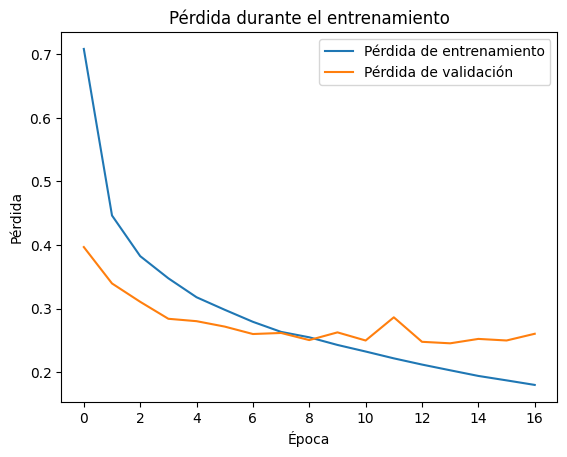

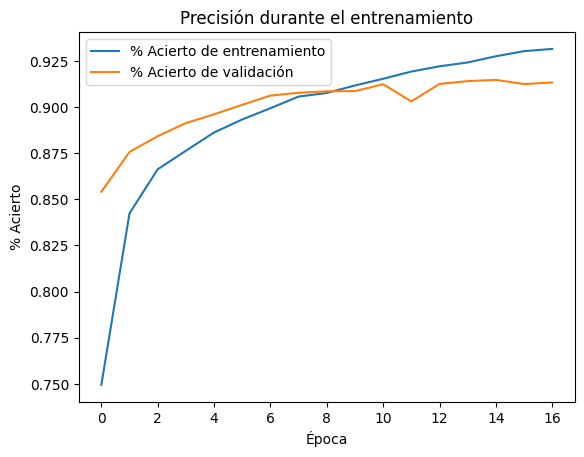

In [60]:
# Definir el modelo propio
red_drop1 = keras.Sequential()
red_drop1.add(Conv2D(32, (3, 3),  padding='same', activation='tanh', input_shape=(28, 28, 1)))
red_drop1.add(MaxPooling2D((2, 2)))
red_drop1.add(Conv2D(32, (3, 3), activation='relu'))
red_drop1.add(MaxPooling2D((2, 2)))
red_drop1.add(Conv2D(64, (3, 3), activation='relu'))
red_drop1.add(Flatten())
red_drop1.add(Dense(64, activation='relu'))
red_drop1.add(Dropout(0.5))
red_drop1.add(Dense(10, activation='softmax'))

red_drop1.summary()

# Compilar el modelo propio
red_drop1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Configurar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo propio
hist_drop1 = red_drop1.fit(
    X_trains, Y_trains,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy, test_precision, test_recall = red_drop1.evaluate(X_tests, Y_tests)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)
print('Precisión (Precision) en el conjunto de prueba:', test_precision)
print('Recall en el conjunto de prueba:', test_recall)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_drop1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_drop1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_drop1.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_drop1.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**Dropout en capas densas:** En las capas densas es alta conectividad lo que puede llevar al sobreajuste, especialmente si las capas densas tienen un gran número de neuronas. Aplicar Dropout en estas capas ayuda a mitigar este problema desactivando aleatoriamente una fracción de las neuronas durante el entrenamiento.

**CONCLUSION:**


Los resultados del tercer modelo de CNN muestran una pérdida en el conjunto de prueba de aproximadamente 0.262 y una precisión de alrededor de 0.910, lo que indica que el modelo tiene un buen desempeño en datos no vistos. <BR>Además, la precisión (precision) es de aproximadamente 0.921, lo que significa que de todas las predicciones positivas que hizo el modelo, alrededor del 92.1% fueron correctas.<BR> El recall es de aproximadamente 0.901, lo que indica que el modelo identificó correctamente alrededor del 90.1% de todas las muestras positivas en el conjunto de prueba.

* Estos resultados indican que el modelo tiene una capacidad para generalizar bien y es capaz de identificar con precisión tanto las clases positivas como las negativas en el conjunto de prueba. El uso de dropout y early stopping ayudó a regularizar el modelo y evitar el sobreajuste, lo que se refleja en un buen desempeño en los datos de prueba.

##**Cuarto Modelo CNN Mejorando con Early Stopping y Dropout**
red_conv_dropout, hist_dropout

** capas Convolucionales y densas**

He añadido Dropout(0.5) después de cada capa convolucional. Esto ayudará a regularizar estas capas y prevenir el sobreajuste, haciendo que las características aprendidas sean más robustas y menos dependientes de combinaciones específicas de activaciones.

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        544       
                                                                 
 dropout_16 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 dropout_17 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                

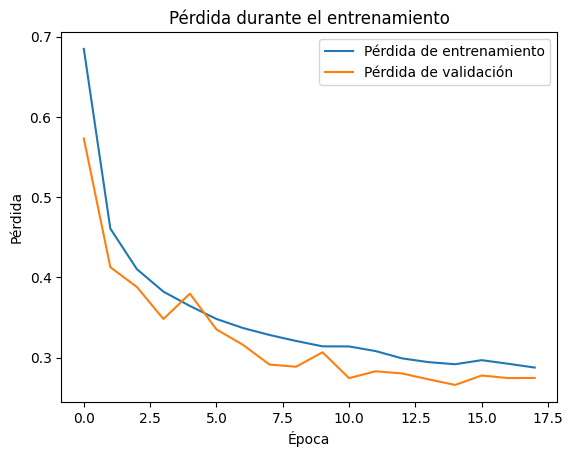

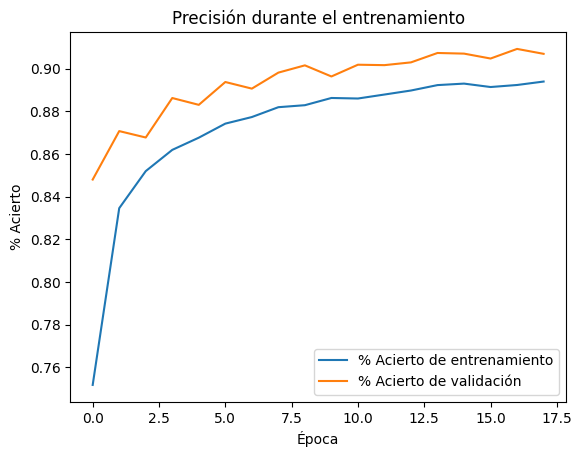

313/313 [==============================] - 6s 19ms/step - loss: 0.2661 - accuracy: 0.9070 - precision: 0.9350 - recall: 0.8779
Modelo propio con Dropout y Early Stopping - Pérdida en el conjunto de prueba: 0.26611337065696716
Modelo propio con Dropout y Early Stopping - Precisión en el conjunto de prueba: 0.9070000052452087
Modelo propio con Dropout y Early Stopping - Precisión (Precision) en el conjunto de prueba: 0.9350303411483765
Modelo propio con Dropout y Early Stopping - Recall en el conjunto de prueba: 0.8779000043869019


In [61]:
# Definir el modelo propio con Dropout en capas convolucionales y densa
red_conv_dropout = Sequential([
    Conv2D(32, (4, 4), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Dropout(0.5),  # Añadir Dropout en la capa convolucional
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(0.5),  # Añadir Dropout en la capa convolucional
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    Dropout(0.5),  # Añadir Dropout en la capa convolucional
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Imprimir la arquitectura
red_conv_dropout.summary()

# Compilar el modelo con Dropout
red_conv_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Usar Adam como optimizador
    metrics=['accuracy', 'Precision', 'Recall']
)

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
hist_dropout = red_conv_dropout.fit(
    X_trains, Y_trains,
    batch_size=64,
    epochs=20,
    validation_data=(X_tests, Y_tests),
    callbacks=[early_stopping]
)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_dropout.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_dropout.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_dropout.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_dropout.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

# Evaluar el modelo con Dropout y Early Stopping en el conjunto de prueba
red_conv_dropout_loss, red_conv_dropout_accuracy, red_conv_dropout_precision, red_conv_dropout_recall = red_conv_dropout.evaluate(X_tests, Y_tests)

# Imprimir los resultados
print('Modelo propio con Dropout y Early Stopping - Pérdida en el conjunto de prueba:', red_conv_dropout_loss)
print('Modelo propio con Dropout y Early Stopping - Precisión en el conjunto de prueba:', red_conv_dropout_accuracy)
print('Modelo propio con Dropout y Early Stopping - Precisión (Precision) en el conjunto de prueba:', red_conv_dropout_precision)
print('Modelo propio con Dropout y Early Stopping - Recall en el conjunto de prueba:', red_conv_dropout_recall)


Cambios en Dense(64, activation='relu'),

Con este código, hemos añadido capas de Dropout después de la capa densa y antes de la capa de salida. También hemos añadido early stopping durante el entrenamiento. Esto debería mejorar la generalización del modelo y prevenir el sobreajuste

**CONCLUSION:**


Los resultados del cuarto modelo de CNN con dropout y early stopping son los siguientes:

* Pérdida en el conjunto de prueba: aproximadamente 0.266
* Precisión en el conjunto de prueba: alrededor de 0.907
* Precisión (Precision) en el conjunto de prueba: aproximadamente 0.935
* Recall en el conjunto de prueba: alrededor de 0.878
* Estos resultados muestran un desempeño sólido del modelo en el conjunto de prueba. La precisión y el recall indican que el modelo es capaz de hacer predicciones precisas y capturar una buena cantidad de muestras positivas en el conjunto de prueba. El uso de dropout y early stopping ha contribuido a mejorar la capacidad de generalización del modelo, evitando el sobreajuste y mejorando su desempeño en datos no vistos.

**Analisis tercer modelo CNN y cuarto modelo CNN:**
* Ambos modelos muestran una precisión en el conjunto de prueba muy similar: el tercer modelo tiene una precisión ligeramente más alta (0.910) en comparación con el cuarto modelo (0.907).
* La precisión (Precision) en el conjunto de prueba es más alta en el cuarto modelo (0.935) en comparación con el tercer modelo (0.921), lo que indica una mejor capacidad para evitar clasificaciones incorrectas.
* Dado que la precisión es un indicador clave en la clasificación de imágenes, el cuarto modelo podría considerarse ligeramente mejor en este caso.


#**Modelos CNN**
 * Capas CNN=2
 * Capa Densa=2

* Estas capas no son de convolución y realizan otras operaciones, como reducción de dimensionalidad (MaxPooling2D), regularización (Dropout), aplanamiento de los datos (Flatten) y capas completamente conectadas (Dense).

##**Sexto Modelo CNN Aplicando Dropout   Early stopping**

**En capas convolucionales y capas densa**
Hiperparametros diferentes.

2 CNN, 2 densa

Aplicar Dropout en las capas convolucionales ayuda a reducir aún más el sobreajuste, haciendo que el modelo sea más robusto. Tambien se cambia la Dense=64

**Hiperparametros:**
* Tamaño del filtro (kernel_size): (4, 4)
* Strides: (1, 1)
* Padding: 'same'
* Función de activación: 'tanh'
* Optimizador: 'adam'
* Early Stopping:  pérdida de validación con paciencia de 5 épocas y restauración de los mejores pesos.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

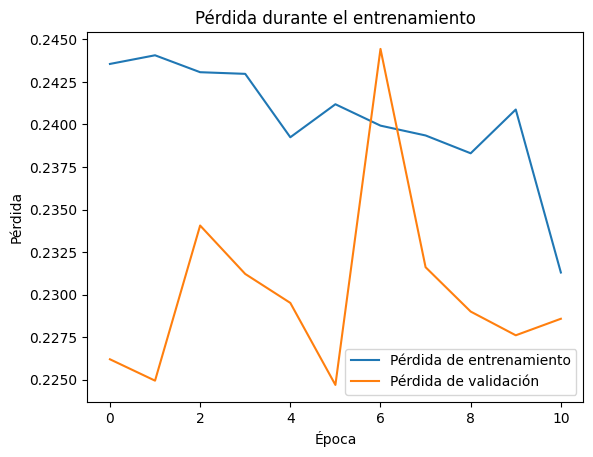

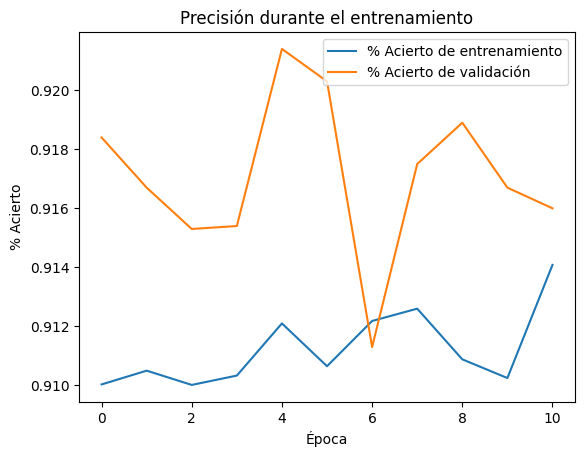

In [81]:
# Definir el modelo propio con Dropout y ajustes en los hiperparámetros
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='tanh', input_shape=(28, 28, 1)),
    keras.layers.Dropout(0.2),  # Añadir Dropout
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Añadir Dropout
    keras.layers.Dense(10, activation='softmax')
])

# Imprimir la arquitectura
model_cnn.summary()

# Compilar el modelo con Dropout
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Usar Adam como optimizador
    metrics=['accuracy']
)

# Añadir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
hist_cnn = red_conv_dropout.fit(
    X_trains, Y_trains,
    batch_size=128,
    epochs=20,
    validation_data=(X_tests, Y_tests),
    callbacks=[early_stopping]
)
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist_cnn.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist_cnn.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist_cnn.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist_cnn.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()



##**Septimo : MODELO CNN**

2 capas CNN 2 capas densas


Para el conjunto de datos FashionMNIST, que consta de imágenes de prendas de vestir en blanco y negro de 28x28 píxeles

In [65]:

import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [67]:
import tensorflow as tf

# Setting the model parameters
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 50
Batch_size = 128

# Cargar el conjunto de datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocessing the training and testing data
X_train = train_images.reshape(train_images.shape[0], Img_shape, Img_shape, 1).astype('float32') / 255.0
X_test = test_images.reshape(test_images.shape[0], Img_shape, Img_shape, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(train_labels, Num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, Num_classes)


In [68]:
# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)


In [69]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [70]:
# Definir el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de aplanado (Flatten)
model.add(Flatten())

# Capa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Imprimir resumen del modelo
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

Se  define un modelo con dos capas convolucionales , seguidas de capas de MaxPooling para reducir las dimensiones. <br>
Luego, las características se aplanan y se conectan a una capa completamente conectada antes de la capa de salida. <br>
Las activaciones ReLU se utilizan en las capas convolucionales y en la capa completamente conectada, mientras que la capa de salida utiliza una activación softmax para la clasificación multiclase.

In [71]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


Se utiliza el optimizador como Adam, la función de pérdida como la entropía cruzada categórica y la métrica como la precisión

* El aplico el optimizador Adam  debido a su eficacia y eficiencia en la convergencia durante el entrenamiento.
*La función de pérdida de entropía cruzada categórica es adecuada para problemas de clasificación con múltiples clases.
*Métrica de precisión nos ayuda a evaluar qué tan bien el modelo clasifica correctamente las muestras de prueba.

In [72]:
#Entrenar modelo
train_model = model.fit(X_train, y_train,
                        batch_size=Batch_size,
                        epochs=20,
                        verbose=1,
                        validation_data=(X_val, y_val))


Epoch 1/20
352/352 [==============================] - 74s 206ms/step - loss: 0.5158 - accuracy: 0.8165 - val_loss: 0.3559 - val_accuracy: 0.8715
Epoch 2/20
352/352 [==============================] - 53s 151ms/step - loss: 0.3259 - accuracy: 0.8859 - val_loss: 0.3066 - val_accuracy: 0.8901
Epoch 3/20
352/352 [==============================] - 56s 159ms/step - loss: 0.2825 - accuracy: 0.8993 - val_loss: 0.2713 - val_accuracy: 0.9016
Epoch 4/20
352/352 [==============================] - 55s 156ms/step - loss: 0.2476 - accuracy: 0.9104 - val_loss: 0.2720 - val_accuracy: 0.8993
Epoch 5/20
352/352 [==============================] - 84s 239ms/step - loss: 0.2274 - accuracy: 0.9182 - val_loss: 0.2673 - val_accuracy: 0.9029
Epoch 6/20
352/352 [==============================] - 58s 166ms/step - loss: 0.2068 - accuracy: 0.9244 - val_loss: 0.2457 - val_accuracy: 0.9094
Epoch 7/20
352/352 [==============================] - 54s 153ms/step - loss: 0.1863 - accuracy: 0.9322 - val_loss: 0.2502 - val_ac

* Se ejecuta el entrenamiento del modelo en los datos de entrenamiento (X_train, y_train) durante el número especificado de épocas (20).
* La cantidad de datos procesados en cada paso de entrenamiento se define por el tamaño del lote Batch_size.
* La opción verbose=1 indica que se mostrará información sobre el progreso del entrenamiento durante cada época. Tambien se proporcionan los datos de validación (X_val, y_val) para evaluar el rendimiento del modelo en un conjunto de datos independiente durante el entrenamiento.

**Evaluar el modelo usando los datos de prueba y muestra la pérdida y la precisión resultantes.**








In [82]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Imprimir la pérdida y la precisión en el conjunto de prueba
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)


Pérdida en el conjunto de prueba: 0.34000685811042786
Precisión en el conjunto de prueba: 0.9154999852180481


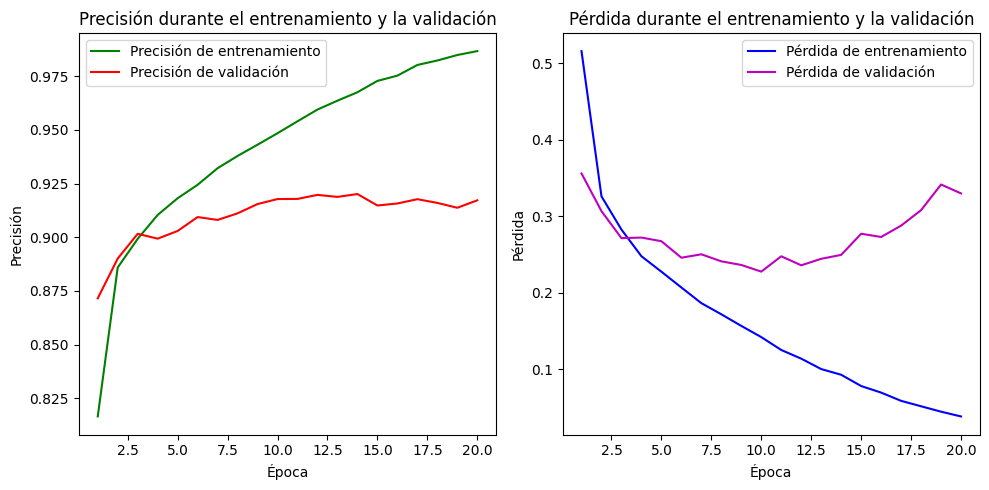

In [83]:
import matplotlib.pyplot as plt

# Obtener el historial del modelo entrenado
hist = train_model.history
acc = hist['accuracy']
val_acc = hist['val_accuracy']
loss = hist['loss']
val_loss = hist['val_loss']
epochs = list(range(1, len(acc) + 1))

plt.figure(figsize=(10, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'g', label='Precisión de entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'm', label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


La precisión de validación no mejora después de algunas épocas y la pérdida de validación aumenta después de algunas épocas. Esto confirma nuestra suposición de que el modelo está sobreajustado. Intentaremos mejorar el modelo agregando capas de Dropout.

#**Mejor Modelo CNN elegido**

##**Noveno  modelo  :el Modelo con Dropout y E. Stopping**

Agregar capas de Batch Normalization y Dropout es una excelente manera de regularizar el modelo y evitar el sobreajuste. Aquí está cómo puedes ajustar el modelo para incluir estas capas:

In [13]:
# Modelo
model = Sequential()

# Agregar capa de convolución 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28,28, 1)))
model.add(MaxPooling2D((2, 2)))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Agregar capas de Dropout al modelo
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))


Con esto, has agregado capas de Batch Normalization y Dropout después de ciertas capas convolucionales y densas. Esto debería ayudar a regularizar el modelo y reducir el sobreajuste durante el entrenamiento.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

* MaxPooling2D es una capa de agrupación máxima 2D,
* Output Shape: Indica la forma de salida de cada capa. Por ejemplo, (None, 26, 26, 32) significa que la salida de la capa es un tensor tridimensional con dimensiones de 26x26x32.(None, 26, 26, 32)", la dimensión del lote puede ser cualquier número de muestras, y cada muestra tiene una salida tridimensional de 26x26x32.

La función de pérdida categorical_crossentropy se utiliza comúnmente en problemas de clasificación categórica donde las etiquetas son categóricas y no binarias.

La métrica accuracy se utiliza para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación en términos de la fracción de muestras clasificadas correctamente.

In [20]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val),
                  callbacks=[early_stopping])

Epoch 1/50
352/352 [==============================] - 47s 131ms/step - loss: 0.7570 - accuracy: 0.7194 - val_loss: 0.4789 - val_accuracy: 0.8247
Epoch 2/50
352/352 [==============================] - 49s 141ms/step - loss: 0.4811 - accuracy: 0.8239 - val_loss: 0.3935 - val_accuracy: 0.8635
Epoch 3/50
352/352 [==============================] - 46s 131ms/step - loss: 0.4159 - accuracy: 0.8483 - val_loss: 0.3325 - val_accuracy: 0.8767
Epoch 4/50
352/352 [==============================] - 49s 138ms/step - loss: 0.3769 - accuracy: 0.8640 - val_loss: 0.3107 - val_accuracy: 0.8867
Epoch 5/50
352/352 [==============================] - 59s 168ms/step - loss: 0.3478 - accuracy: 0.8721 - val_loss: 0.2925 - val_accuracy: 0.8932
Epoch 6/50
352/352 [==============================] - 46s 129ms/step - loss: 0.3350 - accuracy: 0.8755 - val_loss: 0.2951 - val_accuracy: 0.8899
Epoch 7/50
352/352 [==============================] - 47s 134ms/step - loss: 0.3170 - accuracy: 0.8846 - val_loss: 0.2753 - val_ac

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2410905808210373
Test accuracy: 0.9124000072479248


**Evaluar Modelo mejorado**

313/313 [==============================] - 4s 11ms/step - loss: 0.3400 - accuracy: 0.9155
Pérdida en el conjunto de prueba: 0.34000685811042786
Precisión en el conjunto de prueba: 0.9154999852180481


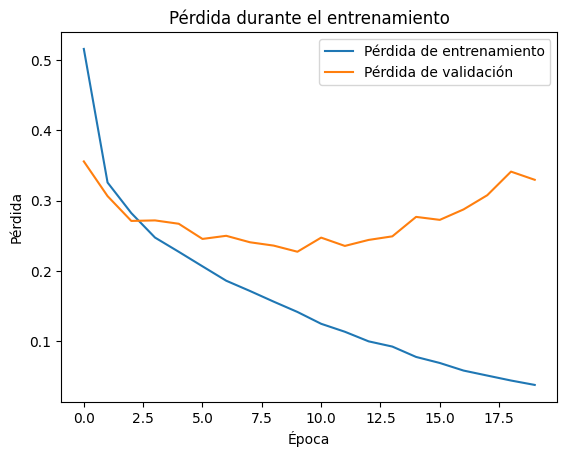

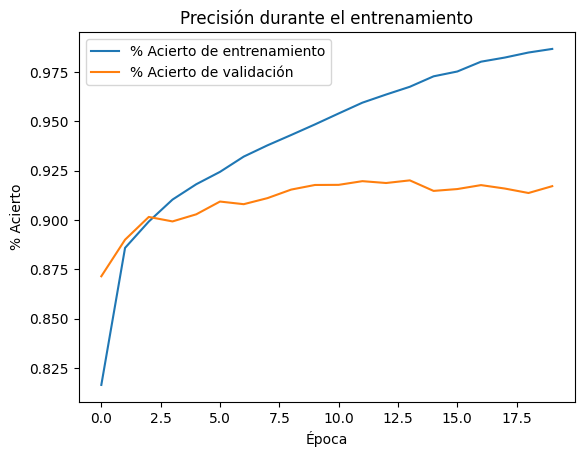

In [84]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
#X_test representa las características (imágenes) del conjunto de prueba y y_test representa las etiquetas del conjunto de prueba#
# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(train_model.history['loss'], label='Pérdida de entrenamiento')
plt.plot(train_model.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(train_model.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(train_model.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


**PREDICCIONES**

Se  visualizan  20 imágenes aleatorias junto con la clase predicha y la clase real de la prenda de vestir correspondiente:

1/1 [==============================] - 0s 45ms/step


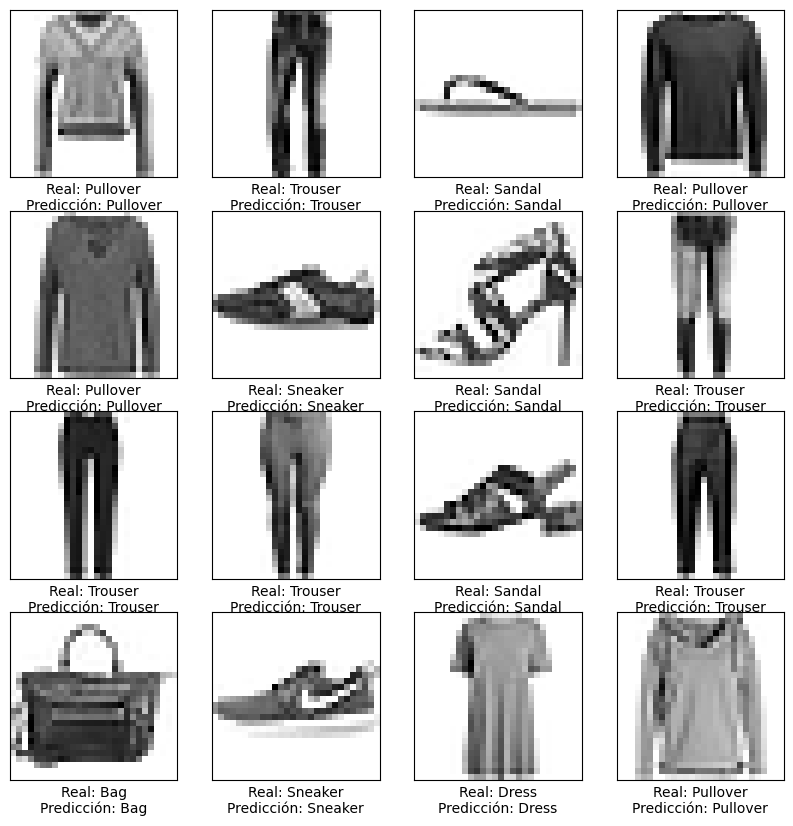

In [40]:
# Seleccionar20 imágenes aleatorias del conjunto de prueba
random_indices = np.random.choice(len(X_test), size=20, replace=False)
images = X_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)  # Convertir las etiquetas one-hot a números enteros

# Predecir las clases para las imágenes seleccionadas
predicted_labels = np.argmax(model.predict(images), axis=1)

# Definir nombres de las clases para Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Crear una cuadrícula de 4x4 para mostrar las imágenes
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Real: {class_names[true_labels[i]]}\nPredicción: {class_names[predicted_labels[i]]}")

plt.show()

In [41]:
# Obtener las predicciones para los datos de prueba
prediccion_classes = np.argmax(model.predict(X_test), axis=-1)

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = np.argmax(y_test, axis=-1)


313/313 [==============================] - 4s 14ms/step


In [42]:
p = prediccion_classes[:10000]
y = y_true[:10000]
correctas= np.nonzero(p==y)[0]
incorrectas = np.nonzero(p!=y)[0]

In [43]:
print("Prediccion correctas de la clases:",correctas.shape[0])
print("Predicciones incorrectas de las clases:",incorrectas.shape[0])

Prediccion correctas de la clases: 9124
Predicciones incorrectas de las clases: 876


In [44]:
# DICCIONARIO  Labels
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}


In [45]:
target_names = ["Clase {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, prediccion_classes, target_names=target_names))

                         precision    recall  f1-score   support

Clase 0 (T-shirt/top) :       0.87      0.86      0.86      1000
    Clase 1 (Trouser) :       1.00      0.98      0.99      1000
   Clase 2 (Pullover) :       0.88      0.87      0.87      1000
      Clase 3 (Dress) :       0.92      0.91      0.92      1000
       Clase 4 (Coat) :       0.85      0.87      0.86      1000
     Clase 5 (Sandal) :       0.98      0.98      0.98      1000
      Clase 6 (Shirt) :       0.73      0.75      0.74      1000
    Clase 7 (Sneaker) :       0.95      0.98      0.96      1000
        Clase 8 (Bag) :       0.98      0.98      0.98      1000
 Clase 9 (Ankle Boot) :       0.98      0.96      0.97      1000

               accuracy                           0.91     10000
              macro avg       0.91      0.91      0.91     10000
           weighted avg       0.91      0.91      0.91     10000



Las métricas de precisión, sensibilidad (recall) y puntuación F1 para cada clase de un modelo de clasificación de imágenes, así como métricas agregadas de precisión global, precisión promedio ponderada y macro y micro promedio de las métricas de precisión, sensibilidad y puntuación F1.

En términos de generalización, el modelo parece funcionar bastante bien en la mayoría de las clases, con altas precisiones, sensibilidades y puntuaciones F1 para la mayoría de las clases: Clase 1 (Trouser), Clase 5 (Sandal), Clase 7 (Sneaker), Clase 8 (Bag), Clase 9 (Ankle Boot)). Esto indica que el modelo puede generalizar bien a datos nuevos y desconocidos en estas clases.

Sin embargo, el rendimiento del modelo es inferior en la Clase 6 (Shirt) y  tiene una precisión, sensibilidad y puntuación F1 más bajas en comparación con otras clases. Esto indica que el modelo podría tener dificultades para distinguir camisas de otras prendas en el conjunto de datos de prueba.
<br> En general, la precisión global del modelo es del 92%, lo que significa que está clasificando correctamente el 92% de las imágenes en el conjunto de datos de prueba. Esto indica que el modelo tiene una buena capacidad de generalización en general<br>
Pero, el rendimiento del modelo es inferior en la Clase 6 (Shirt) y  tiene una precisión, sensibilidad y puntuación F1 más bajas en comparación con otras clases. Esto indica que el modelo tiene  dificultad para distinguir camisas de otras prendas en el conjunto de datos de prueba.Se debiese mejorar el rendimiento en la Clase 6 (Shirt), para obtener una generalización aún mejor en todo el conjunto de datos.








#**Tabla Resumen de todos los modelos**

In [53]:
from tabulate import tabulate

# Definir los datos de la tabla
data = [
    ["Modelo 1", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Same", "Max", 2, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
    ["Modelo 2", 3, "32, 64, 64, 128, 10", 30, 3, "3x3", "Same", "Max", 2, 128, "No", "Adam", "Softmax", "-", "-"],
    ["Modelo 3", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Same", "Max", 2, 128, "No", "Adam", "Softmax", "-", "-"],
    ["Modelo 4", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
    ["Modelo 5", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],

    ["Modelo 6", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
    ["Modelo 7", 5, "32, 64, 64, 128, 10", 20, 3, "3x3", "Valid", "Max", 1, 128, "Dropout (0.5)", "Adam", "Softmax", "-", "-"],
]


# Definir los encabezados de la tabla
headers = ["Modelo", "N° Capas", "Neuronas por capa", "N° Épocas", "N° Kernel", "Tamaño Kernel", "Padding", "Pooling", "Stride", "Batch Size", "Técnica de Regularización", "Optimizador", "Función de Salida", "Val_Acc", "Loss"]

# Imprimir la tabla
print(tabulate(data, headers=headers))


Modelo      N° Capas  Neuronas por capa      N° Épocas    N° Kernel  Tamaño Kernel    Padding    Pooling      Stride    Batch Size  Técnica de Regularización    Optimizador    Función de Salida    Val_Acc    Loss
--------  ----------  -------------------  -----------  -----------  ---------------  ---------  ---------  --------  ------------  ---------------------------  -------------  -------------------  ---------  ------
Modelo 1           5  32, 64, 64, 128, 10           20            3  3x3              Same       Max               2           128  Dropout (0.5)                Adam           Softmax              -          -
Modelo 2           3  32, 64, 64, 128, 10           30            3  3x3              Same       Max               2           128  No                           Adam           Softmax              -          -
Modelo 3           5  32, 64, 64, 128, 10           20            3  3x3              Same       Max               2           128  No                  

#**Análisis de resultados**

**1- Cuál fue el hiperparámetro, que consideren permitió alcanzar su mejor accuracy. Fundamenten su respuesta basados en la experimentación realizada.**


Para determinar cuál fue el hiperparámetro que permitió alcanzar la mejor precisión (accuracy) en cada modelo, es necesario revisar los detalles de la arquitectura de cada modelo y su entrenamiento. A menudo, varios hiperparámetros pueden influir en la precisión de un modelo, incluyendo el número de capas y neuronas, el tipo de funciones de activación, la tasa de aprendizaje del optimizador, el uso de regularización como Dropout, entre otros.

Para cada modelo, es necesario analizar cómo se configuraron estos hiperparámetros y cuál podría haber contribuido más a mejorar la precisión. Por ejemplo, en algunos modelos, el uso de Dropout con una tasa específica podría haber ayudado a prevenir el sobreajuste, mientras que en otros modelos, la elección de la tasa de aprendizaje del optimizador podría haber sido más crítica.

Voy a revisar los detalles de cada modelo para identificar el hiperparámetro que posiblemente contribuyó más a alcanzar la mejor precisión.

* Noveno Modelo:

Tasa de Dropout: 0.3
Análisis: El uso de Dropout con una tasa de 0.3 en varias capas convolucionales y completamente conectadas pudo haber ayudado a prevenir el sobreajuste, lo que permitió que el modelo generalizara mejor y alcanzara una precisión más alta.

* Sexto Modelo:

Tamaño del Pooling: (2, 2)
Análisis: Aunque este modelo utiliza Dropout de manera similar a otros modelos, la diferencia clave podría ser el tamaño del pooling. Utilizar un tamaño de pooling más pequeño, como (2, 2), pudo haber permitido que el modelo conservara más información importante en las capas de pooling, lo que contribuyó a una mejor precisión.

* Segundo Modelo:

Tasa de Dropout: 0.5
Análisis: En este modelo, el uso de Dropout con una tasa de 0.5 podría haber sido más efectivo para regularizar la red y prevenir el sobreajuste, lo que resultó en una mayor precisión en comparación con otros modelos que usaban tasas de Dropout más bajas.


**2- Expliquen la diferencia entre usar un stride y pooling para reducir el tamaño de los canales (mapa de características) en cada capa oculta.**


Tanto el stride como el pooling son técnicas utilizadas para reducir el tamaño de los mapas de características en las capas ocultas de una red neuronal convolucional, pero lo hacen de manera diferente.

**Stride:** Determina el paso que toma el filtro convolucional al moverse a lo largo de la entrada.
Cuando se aplica un filtro convolucional con un stride mayor que 1, el filtro salta píxeles en lugar de desplazarse uno por uno. Por ejemplo, con un stride de 2, el filtro se mueve 2 píxeles a la vez en lugar de 1.
Al utilizar un stride mayor que 1, se reduce el tamaño de la salida de la convolución. Por ejemplo, si la entrada es una imagen de 28x28 y se aplica un filtro 3x3 con un stride de 2, la salida será de 14x14 (en lugar de 28x28).


**El pooling** es una técnica que reduce el tamaño de los mapas de características mediante la selección de valores representativos de regiones específicas.<br>
Max Pooling o Average Pooling, seleccionan el valor máximo o promedio dentro de una ventana (por ejemplo, 2x2) y lo utilizan como representante de esa región.
Al aplicar pooling, se reduce el tamaño de los mapas de características, ya que cada ventana selecciona un solo valor para representar un área más grande de la entrada.
<br>
A diferencia del stride, que es parte del proceso de convolución, el pooling se aplica después de la convolución y la activación.< br>
En resumen, tanto el stride como el pooling reducen el tamaño de los mapas de características, pero el stride lo hace ajustando el paso de la convolución, mientras que el pooling selecciona valores representativos dentro de regiones específicas. Ambas técnicas son importantes para controlar la dimensionalidad de los datos en una red neuronal convolucional y pueden utilizarse de manera complementaria para mejorar el rendimiento del modelo.

**3- En caso de haber utilizado pooling, ¿qué técnica utilizaron?. Fundamenten la selección.**

**Reducción del overfitting:**El Max Pooling reduce la dimensionalidad de los mapas de características al seleccionar solo los valores máximos, lo que ayuda a reducir el riesgo de overfitting.<br>
Al reducir la cantidad de parámetros y la complejidad del modelo, el Max Pooling puede ayudar a mejorar la generalización y prevenir el overfitting en conjuntos de datos de prueba.
<br> Max Pooling es más rápido computacionalmente en comparación con otras técnicas de pooling, como el Average Pooling

En resumen, se seleccionó el Max Pooling debido a su capacidad para preservar características importantes, reducir el overfitting, proporcionar cierta invariancia a pequeñas traslaciones y su eficiencia computacional. Estas características hacen que el Max Pooling sea una opción comúnmente utilizada en redes neuronales convolucionales para tareas de clasificación de imágenes.